In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai import *
from fastai.metrics import error_rate
import pandas as pd
import torch

In [3]:
path ="../input/"
train_df=pd.read_csv(path+"train.csv")
test_df=pd.read_csv(path+"sample_submission.csv")

In [4]:
bs = 128
data = ImageDataBunch.from_csv(path=path, folder='train/train', csv_labels='train.csv', ds_tfms=get_transforms(), size=32, bs=bs).normalize(imagenet_stats)

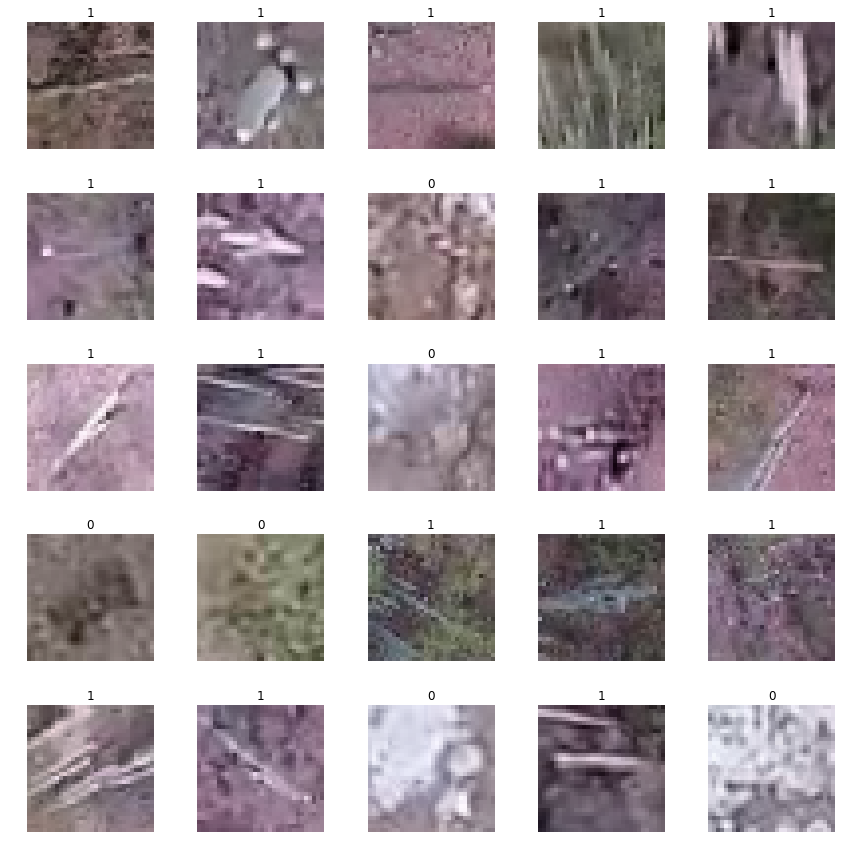

In [5]:
data.show_batch(rows=5, figsize=(12,12))

In [6]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

([0, 1], 2, 14000, 3500)

In [7]:
learn = cnn_learner(data, models.densenet161, metrics=[error_rate, accuracy], model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /tmp/.torch/models/densenet161-8d451a50.pth
115730790it [00:08, 14260726.88it/s]


In [8]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


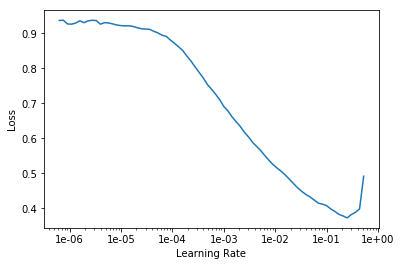

In [9]:
learn.recorder.plot()

In [10]:
learn.fit_one_cycle(5,slice(3e-03,3e-02))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.072388,0.036382,0.013143,0.986857,00:28
1,0.039543,0.036985,0.011429,0.988571,00:25
2,0.031755,0.011545,0.004286,0.995714,00:25
3,0.017420,0.009915,0.003429,0.996571,00:25
4,0.011216,0.006422,0.002857,0.997143,00:25


In [11]:
learn.save('stage-1')

In [12]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


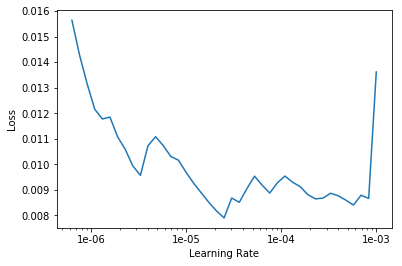

In [13]:
learn.lr_find()
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(2, max_lr=slice(3e-06))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.006826,0.006281,0.002857,0.997143,00:27
1,0.007521,0.006261,0.002857,0.997143,00:28


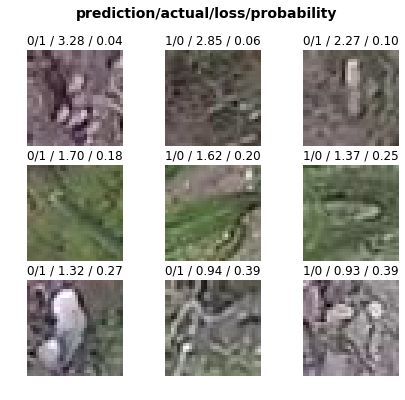

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(7,6))

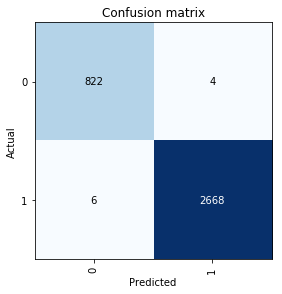

In [16]:
interp.plot_confusion_matrix()

In [17]:
def pred(name):
    a,b,c=learn.predict(open_image("../input/test/test/"+name))
    return c[1].numpy()

In [18]:
test_df["has_cactus"]=test_df["id"].apply(lambda x:pred(x))

In [19]:
test_df.to_csv('submission.csv',index=False)